# 介紹
此專案使用PyTorch提供的FashionMNIST(服裝配件圖)資料集，透過CNN進行預測與分類

## 安裝、導入套件

In [34]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random
from torch.utils.data import DataLoader
import torch
import torchvision
from torch import nn
import tqdm

## 引入資料集

In [35]:
# 訓練集
train_data = datasets.FashionMNIST(  # FashionMNIST用於加載Fashion-MNIST數據集，包含10個不同類別的28x28像素灰階服裝配件圖。
    root="image",  # 儲存路徑，若此路徑沒有數據集，則download會下載到此路徑
    train=True,  # 下載訓練數據集，False則為測試數據集
    download=True,  # 如果數據集沒有在指定的root路徑中，就下載到路徑。若路徑中沒資料，又download=False不下載就會報錯。
    transform=ToTensor()  # 轉換成Tensor格式
)

# 測試集(同上，只有train那邊一樣)
test_data = datasets.FashionMNIST(
    root="image",
    train=False,  # 下載測試集
    download=True,
    transform=ToTensor()
)

# 看看資料結構
train_data[0]  # 灰階圖應該介於0-255，但資料集已特徵縮放

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [36]:
# 看看資料全部類別
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Ankle boot
torch.Size([1, 28, 28])
torch.Size([28, 28, 1])


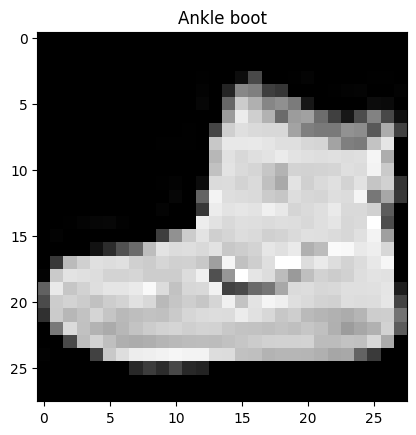

In [37]:
# 取一筆資料出來看看
img, label = train_data[0]  # 圖片、標籤

# 獲取並顯示標籤對應的類別名稱
class_name = train_data.classes
print(class_name[label])  # Ankle boot

# 顯示調整前與調整後的圖像形狀
print(img.shape)  # 灰階，高度，寬度:(1,28,28)
print(img.permute(1, 2, 0).shape)  # 將通道(channel)移至最後一位

# 畫原始數據的圖像
plt.imshow(img.permute(1, 2, 0), cmap="gray")
plt.title(class_name[label])
plt.show()

Text(0.5, 1.0, 'Sneaker')

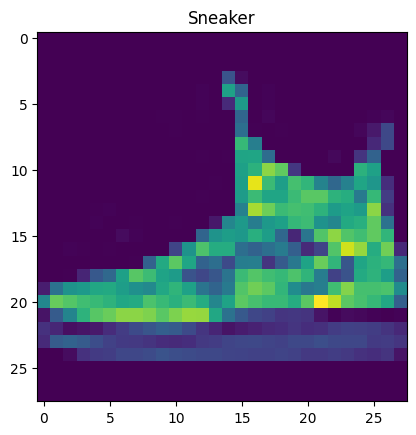

In [38]:
# 再隨機抓一個出來看看
random_idx = random.randint(0, len(train_data)-1)
img, label = train_data[random_idx]

# 畫原始資料的圖
plt.imshow(img.permute(1,2,0))
plt.title(class_name[label])

批量batch size

In [39]:
# 先確認總筆數
len(train_data), len(test_data) # 訓練資料筆數, 測試資料筆數

(60000, 10000)

In [40]:
BATCH_SIZE = 32 # 可選32、64、128、256
# 資料分成一堆一堆(batch)
train_dataloader = DataLoader(
    train_data,  # 來自train_data資料集
    batch_size=BATCH_SIZE,  # 32個一堆
    shuffle=True  # 打亂訓練資料
)
test_dataloader = DataLoader(
    test_data,  # test_data
    batch_size=BATCH_SIZE,  # 32個一堆
    shuffle=False  # 不須訓練所以不須打亂
    )

In [41]:
# 看看有幾批次(組)
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [42]:
# x：feature(圖片), y：label
x_first_batch, y_first_batch = next(iter(train_dataloader))  # 獲取train_dataloader轉成迭代器後的第一批次數據
x_first_batch.shape, y_first_batch.shape  # 看看第一批數據的特徵與標籤形狀

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [43]:
# 取一筆來看看
x_first_batch[0], y_first_batch[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4588, 0.2667,
           0.0000, 0.0157, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2039, 0.2510, 0.3922,
           0.5059, 0.5608, 0.5882, 0.5725, 0.5608, 0.3569, 0.4784, 0.2392,
           0.0000, 0.0196, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0157, 0.0000, 0.2588, 0.6039, 0.6000, 0.6431,
           0.6627, 0.6667, 0.7255, 0.7647, 0.7647, 0.7647, 0.7569, 0.2275,
           0.0000, 0.0157, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0196, 0.0000, 0.2627, 0.5882, 0.5725, 0.6235,
           0.6588, 0.6667, 0.7059, 0.7294, 

Text(0.5, 1.0, 'Dress')

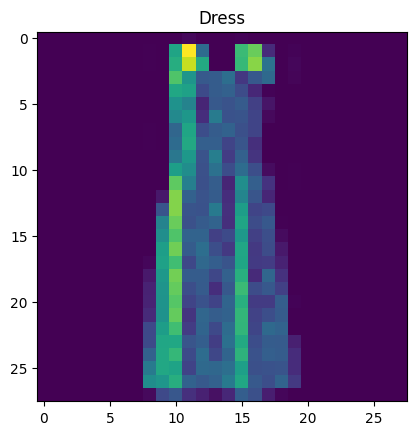

In [44]:
# 隨機取樣
random_idx = random.randint(0, len(x_first_batch)-1)
img, label = x_first_batch[random_idx], y_first_batch[random_idx]
# 畫原始資料的圖
plt.imshow(img.permute(1,2,0))
plt.title(class_name[label])

Flatten

In [45]:
# 確認形狀以便之後攤平
x_first_batch[0].shape

torch.Size([1, 28, 28])

In [46]:
# 攤平，二維轉一維：28*28=784
f = nn.Flatten()
f(x_first_batch[0]).shape

torch.Size([1, 784])

## 建模

In [47]:
class ImageClassificationModel(nn.Module):
  def __init__(self, input_shape, output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(start_dim=1, end_dim=-1),  # 輸入張量攤平，從第一個維度到最後一個維度
      nn.Linear(in_features=input_shape, out_features=output_shape),  # 根據攤平特徵輸入計算出輸出
      nn.Softmax(dim=1)  # 將輸出轉換成機率分布
    )
  def forward(self, x):
    return self.layer_stack(x)  # 定義前向傳播

In [48]:
# 再前進到下一批次
x_first_batch, y_first_batch = next(iter(train_dataloader))
x_first_batch.shape, y_first_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [49]:
torch.manual_seed(1) # 固定隨機
model = ImageClassificationModel(28*28, 10)
y_pred = model(x_first_batch)
y_pred.argmax(dim=1) # 回傳最大機率的預測類別

tensor([6, 6, 6, 6, 1, 6, 0, 6, 0, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6,
        6, 6, 6, 6, 7, 6, 6, 1])

Loss Function、優化、loss與accuracy

In [50]:
# 定義損失函數
loss_fn = nn.CrossEntropyLoss() # CrossEntropyLoss會幫我們softmax

# 前向傳遞和計算損失
y_pred = model(x_first_batch)
loss = loss_fn(y_pred, y_first_batch)
print(loss, model.state_dict())

# 定義優化器
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)
optimizer.zero_grad()

# 梯度歸零及反向傳遞
loss.backward()
optimizer.step()

#參數更新
y_pred = model(x_first_batch)
loss = loss_fn(y_pred, y_first_batch)
print(loss, model.state_dict())

tensor(2.2974, grad_fn=<NllLossBackward0>) OrderedDict([('layer_stack.1.weight', tensor([[ 0.0184, -0.0158, -0.0069,  ...,  0.0068, -0.0041,  0.0025],
        [-0.0274, -0.0224, -0.0309,  ..., -0.0029,  0.0013, -0.0167],
        [ 0.0282, -0.0095, -0.0340,  ..., -0.0141,  0.0056, -0.0335],
        ...,
        [-0.0355,  0.0131,  0.0193,  ..., -0.0324,  0.0316,  0.0120],
        [ 0.0178,  0.0196,  0.0114,  ...,  0.0253, -0.0041,  0.0252],
        [ 0.0303, -0.0011, -0.0183,  ...,  0.0069,  0.0037, -0.0249]])), ('layer_stack.1.bias', tensor([ 0.0306,  0.0015,  0.0277,  0.0178, -0.0313,  0.0318,  0.0006,  0.0085,
        -0.0246,  0.0139]))])
tensor(2.2962, grad_fn=<NllLossBackward0>) OrderedDict([('layer_stack.1.weight', tensor([[ 0.0184, -0.0158, -0.0069,  ...,  0.0068, -0.0041,  0.0025],
        [-0.0274, -0.0224, -0.0309,  ..., -0.0029,  0.0013, -0.0167],
        [ 0.0282, -0.0095, -0.0340,  ..., -0.0141,  0.0056, -0.0335],
        ...,
        [-0.0355,  0.0131,  0.0193,  ..., -0.0

計算準確率

In [51]:
def accuracy_fn(y_pred, y_true):
 correct_num = (y_pred==y_true).sum() #算預測跟實際加總值
 acc = correct_num / len(y_true) * 100
 return acc

訓練、測試

In [52]:
# 設定優先使用GPU跑，不行則用cpu
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

ImageClassificationModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Softmax(dim=1)
  )
)

In [53]:
# 訓練函數
def train_step(dataloader, model, loss_fn, optimizer, accuracy_fn, device):
  # 初始化損失和準確度
  train_loss = 0
  train_acc = 0

  for batch, (x,y) in enumerate(dataloader):  # 透過enumerate(dataloader)可知道現在在第幾個batch
    # 將資料轉移到訓練的裝置
    x = x.to(device)
    y = y.to(device)

    # 把模型設置為訓練模式並進行預測
    model.train()
    y_pred = model(x)

    # 計算損失和準確度
    loss = loss_fn(y_pred, y) # 算每一batch的loss
    train_loss += loss
    train_acc += accuracy_fn(y_pred.argmax(dim=1), y)

    # 優化器梯度歸零、倒傳遞及參數更新
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


  # 計算平均損失和準確度
  train_loss /= len(train_dataloader) # train_loss = train_loss/len(train_dataloader)
  train_acc /= len(train_dataloader)

  print(f"\nTrain loss:{train_loss:.4f}, Train Acc: {train_acc:.2f}")

In [54]:
# 測試函數
def test_step(dataloader, model, loss_fn, accuracy_fn, device):

  # 初始化損失和準確度
  test_loss = 0
  test_acc = 0

  # 進入測試階段(像是dropout和batch normalization在訓練時會啟用，在測試時就會關閉)
  model.eval()

  # 開始測試
  with torch.inference_mode():
      for x,y in dataloader:  # 遍歷每個x.y
        x = x.to(device)  # 將資料轉移到訓練的裝置
        y = y.to(device)

        test_pred = model(x)  # 把x丟到模型內進行預測
        test_loss += loss_fn(test_pred, y)
        test_acc += accuracy_fn(test_pred.argmax(dim=1), y)

      # 計算平均損失和準確度
      test_loss /= len(test_dataloader)
      test_acc /= len(test_dataloader)
      print(f"\nTest loss:{test_loss:.4f}, Test Acc: {test_acc:.2f}")

In [55]:
epochs = 10  # 迭代10次
for epoch in range(epochs):
  print(f"Epoch: {epoch}\n-------")  # 打印當前迭代輪數

  # 代入上面定義的訓練與測試函數
  train_step(train_dataloader, model, loss_fn, optimizer, accuracy_fn, device)
  test_step(test_dataloader, model, loss_fn, accuracy_fn, device)

Epoch: 0
-------

Train loss:2.0338, Train Acc: 50.28

Test loss:1.9397, Test Acc: 55.33
Epoch: 1
-------

Train loss:1.9253, Train Acc: 55.72

Test loss:1.9160, Test Acc: 55.78
Epoch: 2
-------

Train loss:1.8697, Train Acc: 62.83

Test loss:1.8410, Test Acc: 67.27
Epoch: 3
-------

Train loss:1.8232, Train Acc: 68.91

Test loss:1.8147, Test Acc: 69.29
Epoch: 4
-------

Train loss:1.8037, Train Acc: 70.05

Test loss:1.8004, Test Acc: 70.12
Epoch: 5
-------

Train loss:1.7921, Train Acc: 70.69

Test loss:1.7911, Test Acc: 70.63
Epoch: 6
-------

Train loss:1.7841, Train Acc: 71.13

Test loss:1.7843, Test Acc: 70.91
Epoch: 7
-------

Train loss:1.7782, Train Acc: 71.42

Test loss:1.7792, Test Acc: 71.30
Epoch: 8
-------

Train loss:1.7735, Train Acc: 71.67

Test loss:1.7748, Test Acc: 71.52
Epoch: 9
-------

Train loss:1.7696, Train Acc: 71.86

Test loss:1.7713, Test Acc: 71.62


##第一次模型調整

In [56]:
class ImageClassificationModel2(nn.Module):
  def __init__(self, input_shape, output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(start_dim=1, end_dim=-1),
      nn.Linear(in_features=input_shape, out_features=5),  # 比起原模型，這裡變成5個輸出特徵

      # 下面比原模型新增了兩個激活層與全鏈接層，且激活函數改用ReLU
      nn.ReLU(),
      nn.Linear(in_features=5, out_features=8),
      nn.ReLU(),
      nn.Linear(in_features=8, out_features=output_shape)

    )

  def forward(self, x):
    return self.layer_stack(x)

In [57]:
model_2 = ImageClassificationModel2(28*28, 10)  # 設定輸入和輸出特徵數量
model_2.to(device)  # 將模型移轉裝置
loss_fn = nn.CrossEntropyLoss()  # 定義函數：CrossEntropy
optimizer = torch.optim.SGD(model_2.parameters(), lr = 0.01)  # 定義優化器與學習率

In [58]:
from tqdm.auto import tqdm
# 訓練與測試
epochs = 10

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(train_dataloader, model_2, loss_fn, optimizer, accuracy_fn, device)
  test_step(test_dataloader, model_2, loss_fn, accuracy_fn, device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------

Train loss:1.2688, Train Acc: 53.28

Test loss:0.7779, Test Acc: 69.78
Epoch: 1
-------

Train loss:0.6790, Train Acc: 74.30

Test loss:0.6290, Test Acc: 76.84
Epoch: 2
-------

Train loss:0.5938, Train Acc: 78.48

Test loss:0.6253, Test Acc: 77.18
Epoch: 3
-------

Train loss:0.5584, Train Acc: 80.00

Test loss:0.5528, Test Acc: 79.70
Epoch: 4
-------

Train loss:0.5398, Train Acc: 80.67

Test loss:0.5892, Test Acc: 78.61
Epoch: 5
-------

Train loss:0.5267, Train Acc: 81.21

Test loss:0.5291, Test Acc: 81.04
Epoch: 6
-------

Train loss:0.5150, Train Acc: 81.71

Test loss:0.5231, Test Acc: 81.21
Epoch: 7
-------

Train loss:0.5061, Train Acc: 81.94

Test loss:0.5572, Test Acc: 80.17
Epoch: 8
-------

Train loss:0.5001, Train Acc: 82.14

Test loss:0.5145, Test Acc: 81.54
Epoch: 9
-------

Train loss:0.4939, Train Acc: 82.46

Test loss:0.5194, Test Acc: 81.24


評估模型

In [59]:
# 評估
def eval_model(dataloader, model, loss_fn, accuracy_fn, device):
  # 初始化
  test_loss = 0
  test_acc = 0

  # 測試階段
  model.eval()  # 評估模式，會關閉dropout等訓練專用層
  with torch.inference_mode():
    for x,y in dataloader:
      x = x.to(device)
      y = y.to(device)

      test_pred = model(x)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(test_pred.argmax(dim=1), y)

    # 計算平均
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  return{
      "model_name": model.__class__.__name__,
      "model_loss": test_loss.item(),
      "model_acc": test_acc.item(),
  }


In [60]:
model_1_result = eval_model(test_dataloader, model, loss_fn, accuracy_fn, device)
model_1_result

{'model_name': 'ImageClassificationModel',
 'model_loss': 1.7712616920471191,
 'model_acc': 71.61541748046875}

In [61]:
model_2_result = eval_model(test_dataloader, model_2, loss_fn, accuracy_fn, device)
model_2_result

{'model_name': 'ImageClassificationModel2',
 'model_loss': 0.5193735361099243,
 'model_acc': 81.2400131225586}

準確率與損失調整後效果皆有提升

# 用CNN分類

In [62]:
# 定義卷積層：輸入灰階圖，輸出八個不同的特徵圖，卷積核3*3，步幅1，周圍填充1個像素
conv_layer = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3,3),stride=1, padding=1)
conv_layer(x_first_batch[0]).shape

torch.Size([8, 28, 28])

In [63]:
# 卷積層
conv_layer = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3,3),stride=1, padding=1)
conv_output = conv_layer(x_first_batch[0])
print(conv_output.shape)
# 最大池化層
maxpool = nn.MaxPool2d(kernel_size=(2,2), stride=2, padding = 0)
print(maxpool(conv_output).shape)

torch.Size([8, 28, 28])
torch.Size([8, 14, 14])


In [72]:
class ImageClassificationModel3(nn.Module): # 繼承nn.Module，結構類似VGG
  def __init__(self, input_shape, output_shape):
     super().__init__()

     # 定義卷積block1(卷積層*2, 池化層*1, 積活層*1)
     self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
          out_channels=8,
          kernel_size=(3,3),
          stride=1,
          padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(in_channels=8,
          out_channels=8,
          kernel_size=(3,3),
          stride=1,
          padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = (2,2),
          stride = 2,
          padding = 0
        )
     )

     # 定義卷積block2(卷積層*2, 池化層*1)
     self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=8,
          out_channels=16,
          kernel_size=(3,3),
          stride=1,
          padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(in_channels=16,
          out_channels=16,
          kernel_size=(3,3),
          stride=1,
          padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = (2,2),
          stride = 2,
          padding = 0
        )
     )

     # 定義分類器(全鍊接層*3)
     self.classifier = nn.Sequential(
        nn.Flatten(start_dim=1, end_dim=-1),
        nn.Linear(in_features=7*7*16, out_features=5),
        nn.ReLU(),
        nn.Linear(in_features=5, out_features=8),
        nn.ReLU(),
        nn.Linear(in_features=8, out_features=output_shape)
     )

  # 定義前向傳播
  def forward(self, x):
    x = self.conv_block_1(x)  # x通過block1
    x = self.conv_block_2(x)  # x通過block2
    x = self.classifier(x)  # 得到輸出
    return x

In [73]:
model_3 = ImageClassificationModel3(1, 10)  # 輸入channel：1，類別：10
model_3.to(device)  # 轉移到裝置
loss_fn = nn.CrossEntropyLoss()  # 定義損失函數
optimizer = torch.optim.SGD(model_3.parameters(), lr = 0.01)  # 定義優化契：隨機梯度下降，學習率：0.01

In [66]:
# 訓練與評估
from tqdm.auto import tqdm
epochs = 10
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(train_dataloader, model_3, loss_fn, optimizer, accuracy_fn, device)
  test_step(test_dataloader, model_3, loss_fn, accuracy_fn, device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------

Train loss:2.3052, Train Acc: 10.00

Test loss:2.3010, Test Acc: 9.99
Epoch: 1
-------

Train loss:2.0427, Train Acc: 20.63

Test loss:1.3128, Test Acc: 49.13
Epoch: 2
-------

Train loss:1.2021, Train Acc: 50.98

Test loss:1.0682, Test Acc: 57.43
Epoch: 3
-------

Train loss:0.9367, Train Acc: 61.99

Test loss:0.8240, Test Acc: 68.29
Epoch: 4
-------

Train loss:0.7138, Train Acc: 72.07

Test loss:0.6555, Test Acc: 75.02
Epoch: 5
-------

Train loss:0.5976, Train Acc: 77.14

Test loss:0.5400, Test Acc: 80.21
Epoch: 6
-------

Train loss:0.5272, Train Acc: 80.75

Test loss:0.4935, Test Acc: 82.11
Epoch: 7
-------

Train loss:0.4825, Train Acc: 82.56

Test loss:0.4613, Test Acc: 83.22
Epoch: 8
-------

Train loss:0.4469, Train Acc: 83.94

Test loss:0.4423, Test Acc: 84.20
Epoch: 9
-------

Train loss:0.4220, Train Acc: 84.80

Test loss:0.4227, Test Acc: 84.77


In [74]:
# 評估效能
model_3_result = eval_model(test_dataloader, model_3, loss_fn, accuracy_fn, device)
model_3_result

{'model_name': 'ImageClassificationModel3',
 'model_loss': 2.3171870708465576,
 'model_acc': 9.994009971618652}

# CNN模型2

In [68]:
class ImageClassificationModel4(nn.Module): # CNN(simple VGG)
  def __init__(self, input_shape, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
        out_channels=8,
        kernel_size=(3,3),
        stride=1,
        padding=1
      ),
      nn.ReLU(),
      nn.Conv2d(in_channels=8,
        out_channels=8,
        kernel_size=(3,3),
        stride=1,
        padding=1
      ),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size = (2,2),
        stride = 2,
        padding = 0
      )
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=8,
        out_channels=16,
        kernel_size=(3,3),
        stride=1,
        padding=1
      ),
      nn.ReLU(),
      nn.Conv2d(in_channels=16,
        out_channels=16,
        kernel_size=(3,3),
        stride=1,
        padding=1
      ),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size = (2,2),
        stride = 2,
        padding = 0
      )
    )

    # 與CNN原模型比，全鍊接層從2層減少為1層
    self.classifier = nn.Sequential(
      nn.Flatten(start_dim=1, end_dim=-1),
      nn.Linear(in_features=7*7*16, out_features=output_shape)

    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [77]:
model_4 = ImageClassificationModel4(1, 10)
model_4.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), lr = 0.01)

# 訓練與評估
from tqdm.auto import tqdm
epochs = 10

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(train_dataloader, model_4, loss_fn, optimizer, accuracy_fn, device)
  test_step(test_dataloader, model_4, loss_fn, accuracy_fn, device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------

Train loss:1.0902, Train Acc: 61.37

Test loss:0.6330, Test Acc: 76.69
Epoch: 1
-------

Train loss:0.5057, Train Acc: 81.89

Test loss:0.5313, Test Acc: 79.75
Epoch: 2
-------

Train loss:0.4409, Train Acc: 84.33

Test loss:0.4401, Test Acc: 84.43
Epoch: 3
-------

Train loss:0.4018, Train Acc: 85.74

Test loss:0.4214, Test Acc: 84.68
Epoch: 4
-------

Train loss:0.3737, Train Acc: 86.69

Test loss:0.3869, Test Acc: 86.44
Epoch: 5
-------

Train loss:0.3522, Train Acc: 87.37

Test loss:0.3916, Test Acc: 86.10
Epoch: 6
-------

Train loss:0.3364, Train Acc: 88.10

Test loss:0.3575, Test Acc: 87.18
Epoch: 7
-------

Train loss:0.3257, Train Acc: 88.35

Test loss:0.3660, Test Acc: 86.94
Epoch: 8
-------

Train loss:0.3139, Train Acc: 88.77

Test loss:0.3394, Test Acc: 87.86
Epoch: 9
-------

Train loss:0.3041, Train Acc: 89.10

Test loss:0.3306, Test Acc: 88.28


In [78]:
model_4_result = eval_model(test_dataloader, model_4, loss_fn, accuracy_fn, device)
model_4_result

{'model_name': 'ImageClassificationModel4',
 'model_loss': 0.3305507004261017,
 'model_acc': 88.27875518798828}